In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
sequences_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/evidence-YUPS-R-21-oct.txt', sep='\\t', engine='python')

In [5]:
# remove decoys, which are indicated by a '+' in the Reverse column, and features with no intensity
sequences_df = sequences_df[pd.isna(sequences_df.Reverse) & (sequences_df.Intensity > 0)]

In [6]:
# definition of uniqueness in MaxQuant output with MBR on
unique_peptide_key = ['Sequence','Modifications','Charge']

In [7]:
sequences_df[unique_peptide_key].sample(n=10)

,Sequence,Modifications,Charge
233601,TQLGLLNLHLQQR,Unmodified,3
271874,YSGVCHTDLHAWHGDWPLPVK,Unmodified,3
180864,PVAYYPDPFR,Unmodified,2
61694,FHEEYPEVPQAILSSLLR,Unmodified,3
119500,KGHPIIICNENDEVWAQK,Unmodified,3
185885,QITVVGATSGDTGSAAIYGLR,Unmodified,2
13134,ASAPGSVILLENLR,Unmodified,2
24000,DFHAELSTPLLKPVNK,Unmodified,3
28841,DLETLTMHTK,Unmodified,2
264109,YENIINQIDAQHK,Unmodified,2


In [8]:
sequences_df.Modifications.unique()

array(['Unmodified', 'Oxidation (M)', 'Acetyl (Protein N-term)',
       '2 Oxidation (M)', '3 Oxidation (M)',
       'Acetyl (Protein N-term),Oxidation (M)'], dtype=object)

In [9]:
sequences_df['Type'].unique()

array(['TIMS-MULTI-MSMS', 'TIMS-MULTI-MATCH'], dtype=object)

In [10]:
# unique peptides found across all runs
unique_peptides_count = len(sequences_df.drop_duplicates(subset=unique_peptide_key, keep='first', inplace=False))
unique_peptides_count

15574

In [11]:
sequences_df['group'] = sequences_df['Raw file'].apply(lambda x: x.split('_')[0])

#### analyse the Y+UPS1 runs

In [12]:
ups1_only_df = sequences_df[(sequences_df.group == 'YeastPlusUPS1')]

In [13]:
# count how many runs each sequence/charge was extracted from
sequence_occurences_l = []
for group_name,group_df in ups1_only_df.groupby(unique_peptide_key, as_index=False):
    sequence_occurences_l.append((group_name[0], group_name[1], len(group_df['Raw file'].unique())))
ups1_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence','charge','number_of_runs_extracted'])

In [14]:
number_of_ups1_runs_in_experiment = len(ups1_only_df['Raw file'].unique())
print('there are {} Y+UPS1 runs in the experiment'.format(number_of_ups1_runs_in_experiment))

there are 10 Y+UPS1 runs in the experiment


In [15]:
# display the number of missing values in only the YHE runs
ups1_sequence_occurences_df['missing_files'] = number_of_ups1_runs_in_experiment - ups1_sequence_occurences_df.number_of_runs_extracted
proportion_of_missing_extractions = ups1_sequence_occurences_df.missing_files.sum() / (len(ups1_sequence_occurences_df) * number_of_ups1_runs_in_experiment)
print("{}% of values missing across the YUPS1 runs.".format(round(proportion_of_missing_extractions*100)))

22.0% of values missing across the YUPS1 runs.


In [16]:
modified_sequences_count_ups1_runs = len(ups1_sequence_occurences_df)
modified_sequences_count_ups1_runs

15040

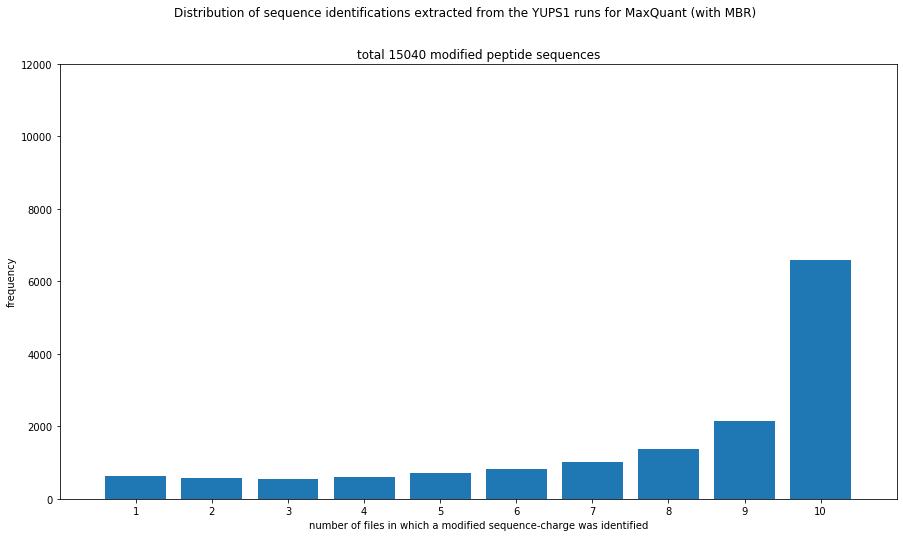

In [17]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence identifications extracted from the YUPS1 runs for MaxQuant (with MBR)')
plt.title('total {} modified peptide sequences'.format(modified_sequences_count_ups1_runs))

counts = np.bincount(ups1_sequence_occurences_df.number_of_runs_extracted)
ax1.bar(range(11), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was identified')
plt.ylabel('frequency')
ax1.set(xticks=range(1,11), xlim=[0, 11])
plt.ylim((0,12000))

plt.show()

#### analyse the Y+UPS2 runs

In [18]:
ups2_only_df = sequences_df[(sequences_df.group == 'YeastPlusUPS2')]

In [19]:
# count how many runs each sequence/charge was extracted from
sequence_occurences_l = []
for group_name,group_df in ups2_only_df.groupby(unique_peptide_key, as_index=False):
    sequence_occurences_l.append((group_name[0], group_name[1], len(group_df['Raw file'].unique())))
ups2_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence','charge','number_of_runs_extracted'])

In [20]:
number_of_ups2_runs_in_experiment = len(ups2_only_df['Raw file'].unique())
print('there are {} Y+UPS2 runs in the experiment'.format(number_of_ups2_runs_in_experiment))

there are 10 Y+UPS2 runs in the experiment


In [21]:
# display the number of missing values in only the YUPS2 runs
ups2_sequence_occurences_df['missing_files'] = number_of_ups2_runs_in_experiment - ups2_sequence_occurences_df.number_of_runs_extracted
proportion_of_missing_extractions = ups2_sequence_occurences_df.missing_files.sum() / (len(ups2_sequence_occurences_df) * number_of_ups2_runs_in_experiment)
print("{}% of values missing across the YUPS2 runs.".format(round(proportion_of_missing_extractions*100)))

24.0% of values missing across the YUPS2 runs.


In [22]:
modified_sequences_count_ups2_runs = len(ups2_sequence_occurences_df)
modified_sequences_count_ups2_runs

14816

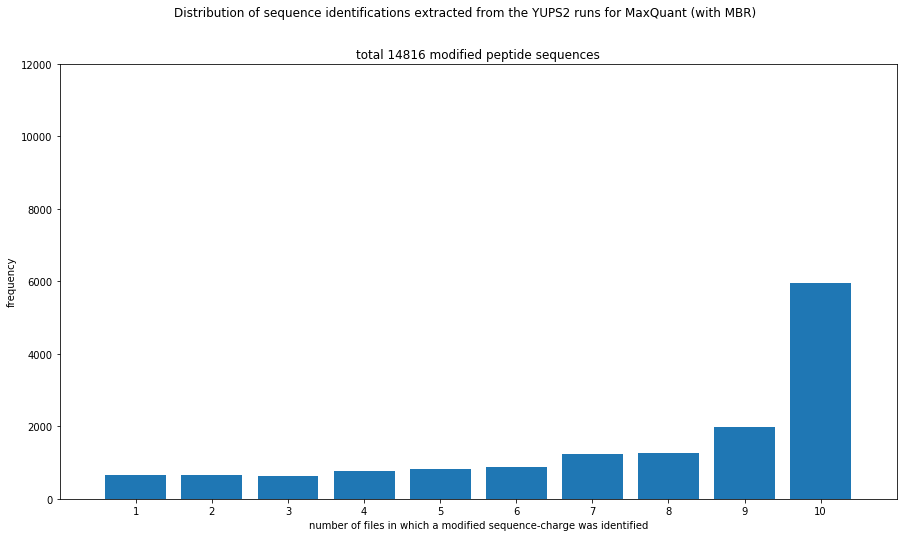

In [23]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence identifications extracted from the YUPS2 runs for MaxQuant (with MBR)')
plt.title('total {} modified peptide sequences'.format(modified_sequences_count_ups2_runs))

counts = np.bincount(ups2_sequence_occurences_df.number_of_runs_extracted)
ax1.bar(range(11), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was identified')
plt.ylabel('frequency')
ax1.set(xticks=range(1,11), xlim=[0, 11])
plt.ylim((0,12000))

plt.show()